In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ambon
Processing Record 2 of Set 1 | kaitangata
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | east london
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | kangaba
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | batemans bay
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | kushima
Processing Record 14 of Set 1 | marsa matruh
Processing Record 15 of Set 1 | ancud
Processing Record 16 of Set 1 | saldanha
Processing Record 17 of Set 1 | chapais
Processing Record 18 of Set 1 | avarua
Processing Record 19 of Set 1 | gerash
Processing Record 20 of Set 1 | tuatapere
Processing Record 21 of Set 1 | tawkar
City not found. Skipping...
Processing Record 22 of Set 1 | saskylakh
Proce

Processing Record 37 of Set 4 | pucallpa
Processing Record 38 of Set 4 | bengkulu
Processing Record 39 of Set 4 | zahirabad
Processing Record 40 of Set 4 | kununurra
Processing Record 41 of Set 4 | nemuro
Processing Record 42 of Set 4 | oranjemund
Processing Record 43 of Set 4 | georgetown
Processing Record 44 of Set 4 | itarema
Processing Record 45 of Set 4 | nanpara
Processing Record 46 of Set 4 | patur
Processing Record 47 of Set 4 | bubaque
Processing Record 48 of Set 4 | ouallam
Processing Record 49 of Set 4 | san patricio
Processing Record 50 of Set 4 | lavrentiya
Processing Record 1 of Set 5 | qaqortoq
Processing Record 2 of Set 5 | christchurch
Processing Record 3 of Set 5 | galle
Processing Record 4 of Set 5 | samusu
City not found. Skipping...
Processing Record 5 of Set 5 | bairiki
Processing Record 6 of Set 5 | weiser
Processing Record 7 of Set 5 | registro
Processing Record 8 of Set 5 | pietarsaari
Processing Record 9 of Set 5 | thinadhoo
Processing Record 10 of Set 5 | chi

City not found. Skipping...
Processing Record 30 of Set 8 | ozernovskiy
Processing Record 31 of Set 8 | kiruna
Processing Record 32 of Set 8 | baoning
Processing Record 33 of Set 8 | cockburn town
Processing Record 34 of Set 8 | rungata
City not found. Skipping...
Processing Record 35 of Set 8 | ossora
Processing Record 36 of Set 8 | port hawkesbury
Processing Record 37 of Set 8 | santa maria da vitoria
Processing Record 38 of Set 8 | balkhash
Processing Record 39 of Set 8 | marcona
City not found. Skipping...
Processing Record 40 of Set 8 | severnoye
Processing Record 41 of Set 8 | usinsk
Processing Record 42 of Set 8 | vostok
Processing Record 43 of Set 8 | winslow
Processing Record 44 of Set 8 | cidreira
Processing Record 45 of Set 8 | broome
Processing Record 46 of Set 8 | lithakia
Processing Record 47 of Set 8 | kudahuvadhoo
Processing Record 48 of Set 8 | blora
Processing Record 49 of Set 8 | vitim
Processing Record 50 of Set 8 | hato mayor
Processing Record 1 of Set 9 | shache
P

Processing Record 16 of Set 12 | havelock
Processing Record 17 of Set 12 | safaga
Processing Record 18 of Set 12 | dubbo
Processing Record 19 of Set 12 | souillac
Processing Record 20 of Set 12 | lakes entrance
Processing Record 21 of Set 12 | karamea
City not found. Skipping...
Processing Record 22 of Set 12 | dhidhdhoo
Processing Record 23 of Set 12 | boyolangu
Processing Record 24 of Set 12 | sumbe
Processing Record 25 of Set 12 | berberati
Processing Record 26 of Set 12 | marzuq
Processing Record 27 of Set 12 | fort smith
Processing Record 28 of Set 12 | merauke
Processing Record 29 of Set 12 | touros
Processing Record 30 of Set 12 | sayyan
Processing Record 31 of Set 12 | mackenzie
Processing Record 32 of Set 12 | hauterive
Processing Record 33 of Set 12 | nishihara
Processing Record 34 of Set 12 | union city
Processing Record 35 of Set 12 | yeppoon
Processing Record 36 of Set 12 | novikovo
Processing Record 37 of Set 12 | sangmelima
Processing Record 38 of Set 12 | balangiga
Proc

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ambon,-3.70,128.18,82.54,74,99,6.44,ID,2020-10-29 23:20:58
1,Kaitangata,-46.28,169.85,62.01,75,100,5.99,NZ,2020-10-29 23:20:58
2,Chuy,-33.70,-53.46,52.29,81,10,10.27,UY,2020-10-29 23:16:17
3,Vaini,-21.20,-175.20,77.00,65,40,11.41,TO,2020-10-29 23:20:59
4,East London,-33.02,27.91,62.94,77,100,19.10,ZA,2020-10-29 23:20:59
5,Rikitea,-23.12,-134.97,75.11,76,54,11.03,PF,2020-10-29 23:20:59
6,Kangaba,11.93,-8.42,75.42,23,95,3.18,ML,2020-10-29 23:20:59
7,Hilo,19.73,-155.09,82.40,74,75,6.93,US,2020-10-29 23:21:00
8,Barrow,71.29,-156.79,21.20,85,90,11.41,US,2020-10-29 23:21:00
9,Batemans Bay,-35.72,150.18,66.99,72,87,1.01,AU,2020-10-29 23:21:00


In [9]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ambon,ID,2020-10-29 23:20:58,-3.70,128.18,82.54,74,99,6.44
1,Kaitangata,NZ,2020-10-29 23:20:58,-46.28,169.85,62.01,75,100,5.99
2,Chuy,UY,2020-10-29 23:16:17,-33.70,-53.46,52.29,81,10,10.27
3,Vaini,TO,2020-10-29 23:20:59,-21.20,-175.20,77.00,65,40,11.41
4,East London,ZA,2020-10-29 23:20:59,-33.02,27.91,62.94,77,100,19.10
...,...,...,...,...,...,...,...,...,...
553,Grand Gaube,MU,2020-10-29 23:23:32,-20.01,57.66,69.01,64,3,3.00
554,Najran,SA,2020-10-29 23:23:33,17.49,44.13,60.80,42,0,1.63
555,Ulaanbaatar,MN,2020-10-29 23:23:33,47.91,106.88,23.00,67,75,2.24
556,Karasburg,NA,2020-10-29 23:23:33,-28.02,18.75,52.81,69,10,5.01


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'10/29/20'

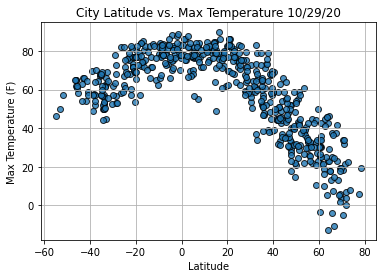

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

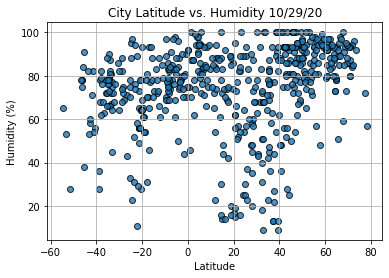

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

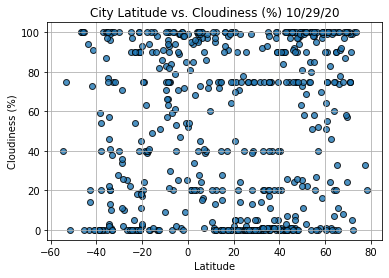

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

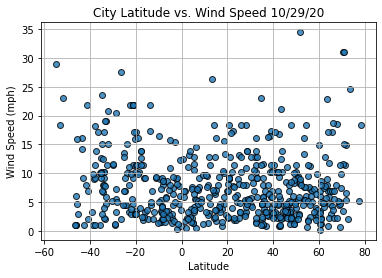

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [29]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
index13 = city_data_df.loc[13]
index13

City                        Ancud
Country                        CL
Date          2020-10-29 23:20:48
Lat                        -41.87
Lng                        -73.82
Max Temp                       54
Humidity                       71
Cloudiness                     73
Wind Speed                   8.05
Name: 13, dtype: object

In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

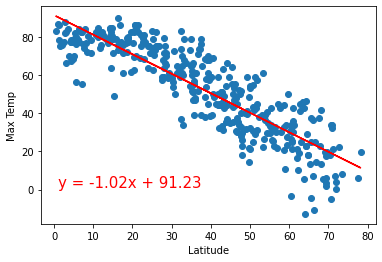

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# CAll the function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(1,1))

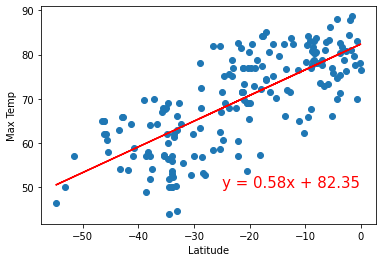

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-25,50))

In [48]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

LinregressResult(slope=0.5797504803368152, intercept=82.35298406742598, rvalue=0.7382156960015637, pvalue=2.749022206777022e-33, stderr=0.03905463345656049)

In [50]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

LinregressResult(slope=-1.020850627823373, intercept=91.22979132191165, rvalue=-0.8748921933145902, pvalue=1.490959145818263e-118, stderr=0.029379009686249423)

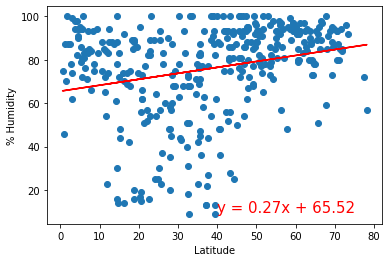

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

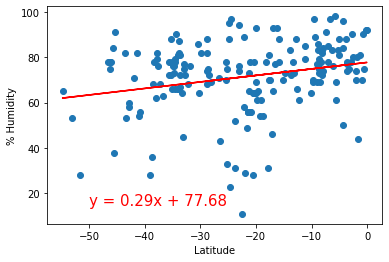

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

In [58]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

LinregressResult(slope=0.27359931508701935, intercept=65.51823821341502, rvalue=0.24895323598506675, pvalue=1.1606448560400734e-06, stderr=0.05533538634337763)

In [59]:
linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

LinregressResult(slope=0.2863242219381974, intercept=77.68438294808509, rvalue=0.2461822704133653, pvalue=0.0007062894329697834, stderr=0.08310293514010673)

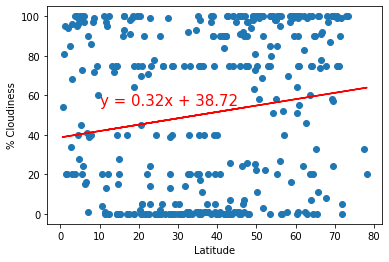

In [64]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,55))

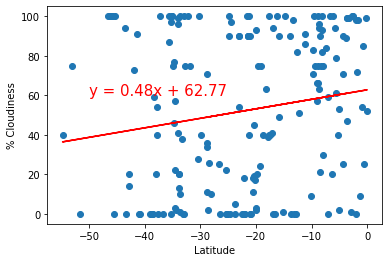

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [65]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

LinregressResult(slope=0.32189322599042086, intercept=38.718359062969924, rvalue=0.15622600754656574, pvalue=0.00251433058748268, stderr=0.10580156106043197)

In [66]:
linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

LinregressResult(slope=0.32189322599042086, intercept=38.718359062969924, rvalue=0.15622600754656574, pvalue=0.00251433058748268, stderr=0.10580156106043197)

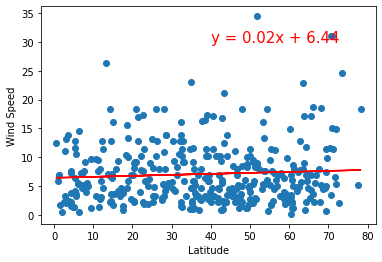

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,30))

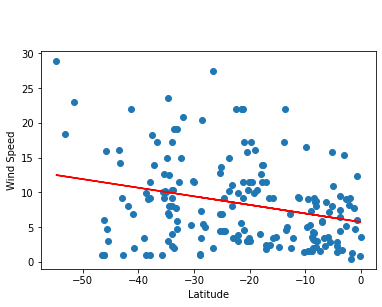

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))